**Hire Analytics**

**Objective**:- to explore hiring trends by examining key company characteristics such as industry, location, revenue, and ratings. It aims to uncover patterns that influence job availability and salary offerings, providing insights into which factors most significantly impact compensation.

In [3]:
#importing all essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for charts
import re # to find Average salary
import matplotlib.cm as cm #for handling colormaps

In [5]:
#importing dataset 
#Exception handling to ensure the DataSet is imported properly
try:
    df = pd.read_csv("C:/Users/Yash/Downloads/mainhiringanalysis.csv", encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Failed to read with ISO-8859-1. Trying cp1252...")
    df = pd.read_csv("C:/Users/Yash/Downloads/mainhiringanalysis.csv", encoding='cp1252')

In [27]:
df.info() # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr.No              515 non-null    int64  
 1   Job Title          515 non-null    object 
 2   Salary Estimate    515 non-null    object 
 3   Job Description    515 non-null    object 
 4   Rating             515 non-null    float64
 5   Company Name       515 non-null    object 
 6   Location           515 non-null    object 
 7   Headquarters       515 non-null    object 
 8   Size               515 non-null    object 
 9   Founded            515 non-null    int64  
 10  Type of ownership  515 non-null    object 
 11  Industry           515 non-null    object 
 12  Sector             515 non-null    object 
 13  Revenue            515 non-null    object 
 14  Competitors        515 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 60.5+ KB


In [33]:
df.describe() # Provides summary of the stastics

,Sr.No,Rating,Founded
count,515.000000,515.000000,515.000000
mean,258.000000,3.666408,1966.856311
std,148.811962,0.465730,52.990407
min,1.000000,1.800000,1698.000000
25%,129.500000,3.400000,1953.500000
50%,258.000000,3.700000,1988.000000
75%,386.500000,3.950000,1999.000000
max,515.000000,5.000000,2017.000000


In [39]:
df.head() # Display the first 5 rows of the DataFrame

,Sr.No,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,1,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Were looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy
1,2,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings
2,3,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster"
3,4,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson"
4,5,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter"


In [46]:
df.tail() # Display the last 5 rows of the DataFrame

,Sr.No,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
510,511,Configuration & Data Management Analyst,$57K-$100K (Glassdoor est.),Description:The coolest jobs on this planet or...,3.8,Lockheed Martin\n3.8,"Littleton, CO","Bethesda, MD",10000+ employees,1995,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD),"Boeing, Northrop Grumman, Raytheon Technologies"
511,512,Business Systems Analyst-Data,$78K-$104K (Glassdoor est.),"Location Centennial, CO Description Our client...",3.5,"The Judge Group, Inc.\n3.5","Centennial, CO","Wayne, PA",1001 to 5000 employees,1970,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"Adecco, Kforce"
512,513,Data Analyst-(Remote- All across,$78K-$104K (Glassdoor est.),About CenturyLink\n\nCenturyLink (NYSE: CTL) i...,3.0,CenturyLink\n3.0,"Broomfield, CO","Monroe, LA",10000+ employees,1930,Company - Public,"Cable, Internet & Telephone Providers",Telecommunications,$10+ billion (USD),"AT&T, Verizon"
513,514,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data"
514,515,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H..."


**What trends and insights can be identified by analyzing the annual revenue of companies? Which company has highest annual revenue?**

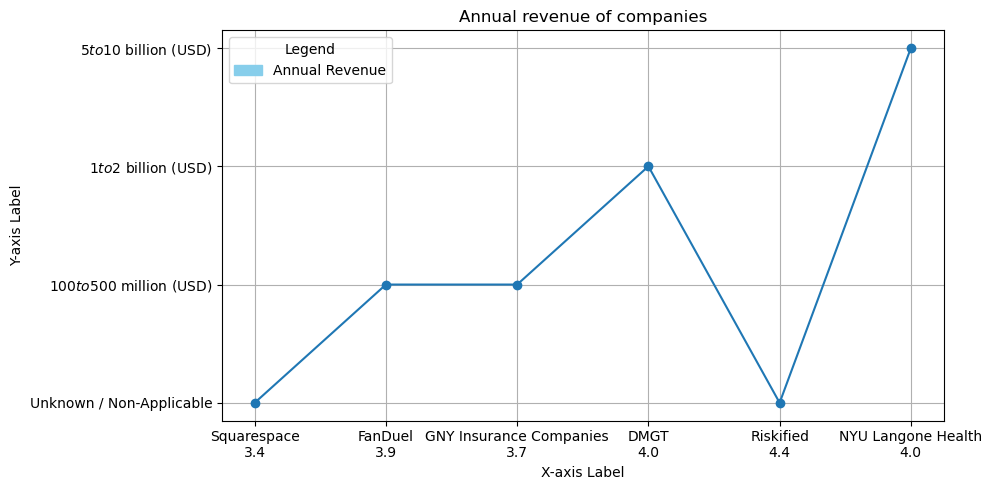

In [9]:

from matplotlib.patches import Patch # For Adding legends
df_first_6=df.head(6)

plt.figure(figsize=(10, 5))
plt.plot(df_first_6['Company Name'], df_first_6['Revenue'], marker='o')  
plt.title('Annual revenue of companies')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
legend_patch = Patch(color='skyblue', label='Annual Revenue')
plt.legend(handles=[legend_patch], loc="upper left", title="Legend")
plt.tight_layout()
plt.grid()
plt.show()

**Conclusion** - rating of the companies do not affect the annual revenue. NYU langone Health has highest Annual revenue Ranging from 5 To 10 billion USD

 **How are company ratings distributed, and what is the most common rating range?**

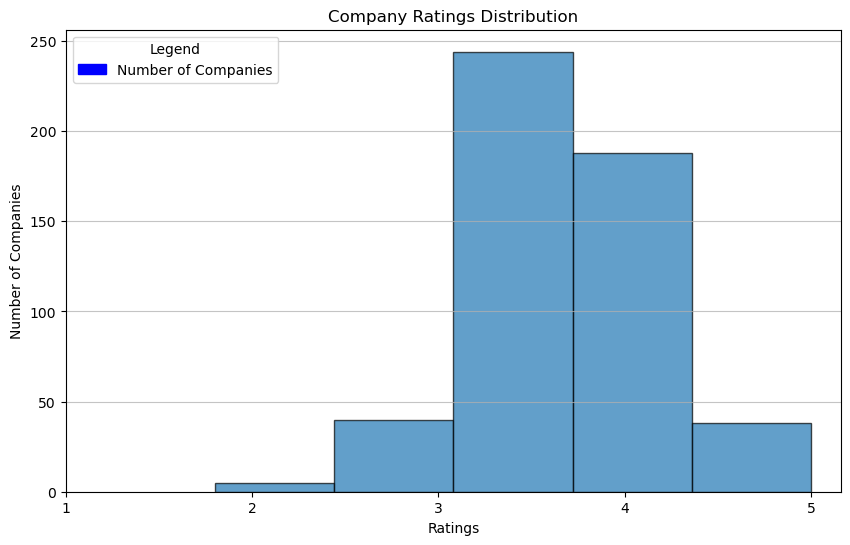

In [15]:
company_ratings = df['Rating']

plt.figure(figsize=(10, 6))
plt.hist(company_ratings, bins=5, edgecolor='black', alpha=0.7)
plt.title('Company Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Number of Companies')
legend_patch = Patch(color='blue', label='Number of Companies')
plt.legend(handles=[legend_patch], loc="upper left", title="Legend")
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(1, 6)) 
plt.show()

**Conclusion**: The distribution of ratings is varied, with the majority of companies falling within mid to high rating ranges.

**Which industries dominate in terms of job offerings?**

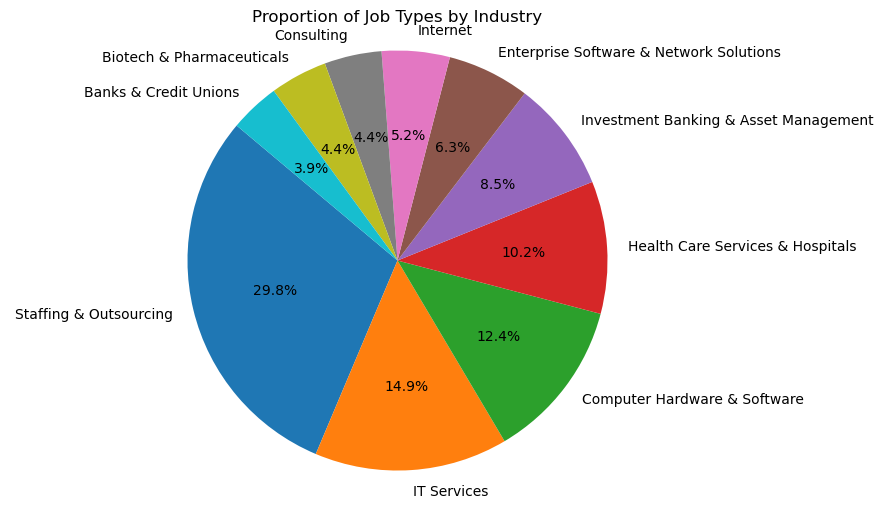

In [133]:
job_industry_counts = df['Industry'].value_counts().head(10) 

plt.figure(figsize=(10, 6))
plt.pie(job_industry_counts, labels=job_industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Job Types by Industry')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular


plt.show()

**Conclusion**: The majority of job postings come from a few key industries, with the top 10 industries holding significant shares of the job market. Staffing and outsourcing Industry is currently at the top

**Which locations have the highest concentration of job offerings?**

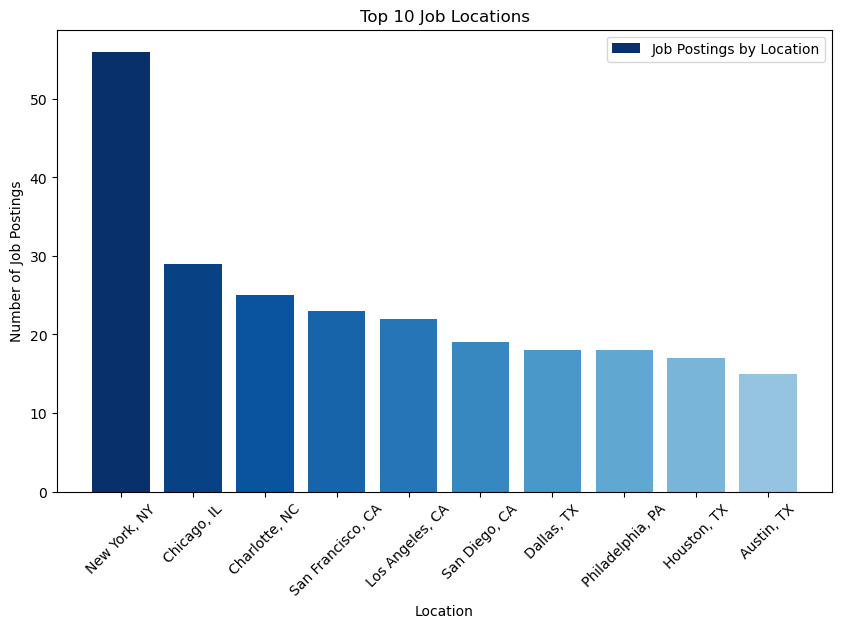

In [76]:
location_counts = df['Location'].value_counts().head(10)
colors = cm.Blues(np.linspace(1, 0.4, len(location_counts)))  # Using a blue gradient

plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values, color=colors, label='Job Postings by Location')
plt.xticks(rotation=45)
plt.title("Top 10 Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.legend(loc="upper right")
plt.show()

**Conclusion**: Job offerings are concentrated in a small number of locations, indicating geographical hotspots for employment

In [114]:
df.head(2)

,Sr.No,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,1,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Were looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy
1,2,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings


**Is there a correlation between company ratings and the average salary offered?**

In [98]:
# Converting salary estimate into average salary
def extract_average_salary(salary):
    # Find the numbers in the salary string
    matches = re.findall(r'\d+', salary)
    if len(matches) == 2:
        # Convert found values to integers and calculate the average
        min_salary = int(matches[0]) * 1000  # Convert to actual salary in dollars
        max_salary = int(matches[1]) * 1000  # Convert to actual salary in dollars
        return (min_salary + max_salary) / 2
    return None  # Return None if not valid

# Apply the function to the Salary Estimate column
df['Average Salary'] = df['Salary Estimate'].apply(extract_average_salary)

# Drop rows where Average Salary is None
df = df.dropna(subset=['Average Salary'])

# Print the first few rows to check
print(df[['Job Title', 'Salary Estimate', 'Average Salary']].head())

                                           Job Title  \
0  Senior Data Analyst, Insights & Analytics Team...   
1                             Reporting Data Analyst   
2                               Data Science Analyst   
3                                       Data Analyst   
4                      Data Analyst, Merchant Health   

              Salary Estimate  Average Salary  
0  $37K-$66K (Glassdoor est.)         51500.0  
1  $37K-$66K (Glassdoor est.)         51500.0  
2  $37K-$66K (Glassdoor est.)         51500.0  
3  $37K-$66K (Glassdoor est.)         51500.0  
4  $37K-$66K (Glassdoor est.)         51500.0  


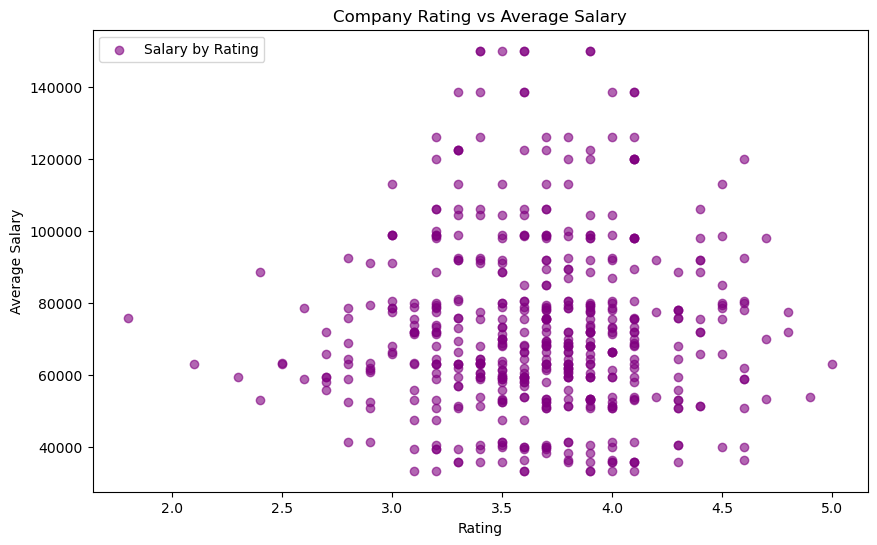

In [102]:
#scatterplot for company rating vs average salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Average Salary'], alpha=0.6, color='purple', label='Salary by Rating')
plt.title("Company Rating vs Average Salary")
plt.xlabel("Rating")
plt.ylabel("Average Salary")
plt.legend(loc="upper left")
plt.show()

**Conclusion**: There is no strong correlation between company ratings and salary, suggesting that higher-rated companies do not necessarily offer higher compensation.